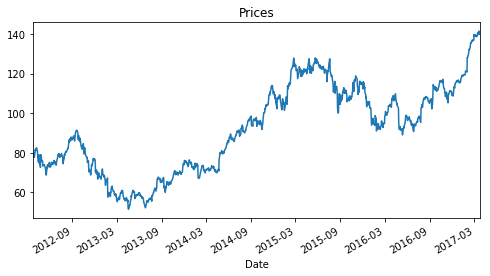

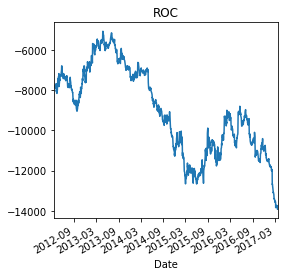

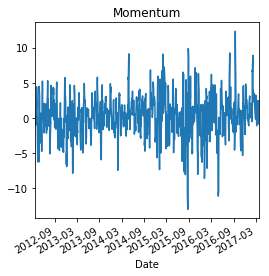

In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
import matplotlib.pyplot as plt4
import datetime
from pandas_datareader import data, wb # pip install pandas-datareader

start = datetime.date(2012, 3, 25)
end = datetime.date(2017, 3, 25)

# Reading in Yahoo Finance data with DataReader
df = data.DataReader('AAPL', 'yahoo', start, end)

df1 = pd.DataFrame(columns=['a','b'])

df["Adj Close"].plot(figsize=(8,4), title="Prices")
plt.show()

# Get the percentage change from out first value to our second
df['Log_Ret'] = np.log(df["Adj Close"] / df["Adj Close"].shift(1))

# Auto Percent change function
df["Perc_Chng"] = df["Adj Close"].pct_change()

#Fill ZEROS instead of NaN values
df.fillna(0, inplace=True)

#Daily cummulative returns
df["DCR"] = (1 + df["Log_Ret"]).cumprod()

#ROC for 05 days
df["ROC"] = (df["Adj Close"]- df["Adj Close"].shift(5) *100)

#Momentum
df["Momentum"] = df["Adj Close"]- df["Adj Close"].shift(4) 

#df["Log_Ret"].hist(bins=25, figsize=(12,4))
df["ROC"].plot(figsize=(4,4), title="ROC")
plt2.show()

df["Momentum"].plot(figsize=(4,4), title="Momentum")
plt3.show()



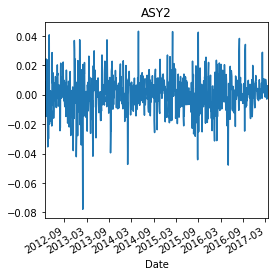

,Adj Close,Log_Ret,Perc_Chng,DCR,ROC,Momentum,ASY1,ASY2
Date,,,,,,,,
2012-03-26,78.640054,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
2012-03-27,79.611755,0.012281,0.012356,1.012281,NaN,NaN,NaN,NaN
2012-03-28,80.018571,0.005097,0.005110,1.017440,NaN,NaN,0.012281,NaN
2012-03-29,79.013187,-0.012644,-0.012564,1.004576,NaN,NaN,0.005097,NaN
2012-03-30,77.677430,-0.017050,-0.016905,0.987448,NaN,-0.962624,-0.012644,0.008689


In [9]:
#Type 2 variable ASY1
SY = np.log(df["Adj Close"]) - (np.log(df["Adj Close"]).shift(1))
df["ASY1"] = SY.shift(1)

#Type 2 variable ASY2
df["ASY2"] = (SY.shift(2) + SY.shift(3))/2

df["ASY2"].plot(figsize=(4,4), title="ASY2")
plt4.show()

# Drop the columns we dont want to use as features
df.drop(["Open", "High", "Low", "Volume", "Close"], axis=1, inplace=True)

df.head()